# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 2 - Clustering




**Harvard University**<br/>
**Spring 2021**<br/>
**Instructors**: Mark Glickman, Pavlos Protopapas, & Chris Tanner 


<hr style="height:2pt">

### Homework 2 is due February 17th

In [1]:
#PLEASE RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- This is individual homework - No collaboration/Groups

- To submit your assignment, please follow the instructions on Canvas.

- Please restart the kernel and run the entire notebook again before you submit. Running cells out of order is a common pitfall in Jupyter Notebooks.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example:
```python
print(f'The R^2 is {R:.4f}')
```
- Your plots should be clearly labeled, including clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95% confidence interval of coefficients of polynomial degree 5" is).

<hr style="height:2pt">

### Please use the libraries below:

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from gap_statistic import OptimalK




<hr style="height:2pt">

<a id="contents"></a>

# Notebook Contents

- [**Problem 1 [37.5 pts]: Clustering with k-means**](#part1)

- [**Problem 2 [37.5 pts]: Other Ks**](#part2)
  
- [**Problem 3 [25 pts]: Alternative Algorithms**](#part3)


<div class="theme">FMA: A Dataset For Music Analysis </div>


In this assignment, you will be working with data collected from The Free Music Archive (https://freemusicarchive.org/). The Free Music Archive is an online repository of original music from independent artists that can be freely downloaded. Each audio file (encoded as mp3) was then reduced into summary audio features using the librosa python package.


The dataset `fma.csv` contains 20,000 rows and 63 columns. Each row corresponds to the audio metadata for one music track. The metadata consists of nine audio features computed across time and summarized:

`1. Chroma, 7 attributes`

`2. Tonnetz, 7 attributes`

`3. Mel Frequency Cepstral Coefficient (MFCC), 7 attributes`

`4. Spectral centroid, 7 attributes`

`5. Spectral bandwidth, 7 attributes`

`6. Spectral contrast, 7 attributes`

`7. Spectral rolloff, 7 attributes`

`8. Root Mean Square energy, 7 attributes`

`9. Zero-crossing rate, 7 attributes`

For those interestend in more information about the FMA dataset please see the paper and GitHub repository (https://github.com/mdeff/fma)

<a id="part1"></a>

## <div class='exercise'>Problem 1: Clustering with k-means </div>

[Return to contents](#contents)

**1.1**  Start by reading the dataset into a pandas data frame. The FMA website includes 16 different music genres so we will begin by trying 16 clusters. Normalize the dataset then run the k-means clustering algorithm, using the `KMeans` class from sklearn.cluster, with the number of clusters corresponding to 16, `n_init` of 46, and 109 as the random seed. Add the result as a new column called `Cluster16` to your data frame.

**1.2**  Use the function provided to visualize the results for k-means on a random sample of 2,000 observations (it will take the sample for you). Does 16 clusters seem to make sense?

**1.3** Plot the silhouette scores using the function below, from lecture. Give it a 10% sample of the data to speed the visualization. How reasonable does the clustering seem based on this plot? How does it compare to the information in the plot above?

**1.4** The FMA website also includes 4 different recording types (album, live recording, radio program, or single track). Repeat all of the above steps, but with the number of clusters corresponding to 4. That is : 

- Run the k-means algorithm with 4 centroids instead of 16, creating a variable named `Cluster4` and adding it to the dataset. 

- Visualize the results for k-means. Does 4 clusters seem to make sense from this plot?

- Plot the silhouette scores on a 10% sample of the data. How reasonable does the clustering seem based on this plot?

**1.5** What do the results suggest? Does this make sense in the context of what we know about the problem?

### Problem 1: Answers

[Return to contents](#contents)

**1.1**  Start by reading the dataset into a pandas data frame. The FMA website includes 16 different music genres so we will begin by trying 16 clusters. Normalize the dataset then run the k-means clustering algorithm, using the `KMeans` class from sklearn.cluster, with the number of clusters corresponding to 16, `n_init` of 46, and 109 as the random seed. Add the result as a new column called `Cluster16` to your data frame.


#### Read and normalize the data

In [3]:
# your code here
data = pd.read_csv('data/fma.csv')
normalizer = MinMaxScaler().fit(data)
scaled_data = pd.DataFrame(normalizer.transform(data), columns = data.columns)

#### K Means algorithm

In [18]:
kmeans = KMeans(n_clusters=16, n_init=46, random_state=109).fit(scaled_data)
scaled_data['Cluster16'] = kmeans.labels_
scaled_data.head()

chroma_cens  chroma_cens.1  chroma_cens.2  chroma_cens.3  chroma_cens.4  \
0     0.000803       0.001274       0.003751       0.019572       0.007545   
1     0.007796       0.003990       0.012031       0.021091       0.020338   
2     0.002002       0.002178       0.010211       0.010494       0.009416   
3     0.000281       0.000441       0.001640       0.065869       0.027857   
4     0.001646       0.001170       0.002999       0.017684       0.010088   

   chroma_cens.5  chroma_cens.6      mfcc    mfcc.1    mfcc.2  ...  tonnetz.5  \
0       0.008177       0.021978  0.002642  0.004844  0.053210  ...   0.023154   
1       0.062479       0.058665  0.018447  0.008065  0.164397  ...   0.153133   
2       0.023729       0.021602  0.009648  0.014284  0.026623  ...   0.029035   
3       0.001372       0.000196  0.002483  0.008402  0.086979  ...   0.010561   
4       0.008841       0.013911  0.011206  0.005955  0.087399  ...   0.031605   

   tonnetz.6       zcr     zcr.1     zcr.2     zcr.3     zcr.4     zcr.5  \
0   0.302169  0.002999  0.330831  0.071996  0.057766  0.037244  0.284238   
1   0.149493  0.001399  0.419920  0.238846  0.239782  0.000000  0.233554   
2   0.216879  0.001402  0.179179  0.058669  0.053406  0.031657  0.265141   
3   0.251411  0.032215  0.480480  0.037384  0.030518  0.061453  0.390615   
4   0.208361  0.000522  0.157157  0.089769  0.086104  0.031657  0.252612   

      zcr.6  Cluster16  
0  0.095473          5  
1  0.121275          4  
2  0.051963         15  
3  0.094820         12  
4  0.065549          5  

[5 rows x 64 columns]

**1.2**  Use the function provided to visualize the results for k-means on a random sample of 2,000 observations (it will take the sample for you). Does 16 clusters seem to make sense?


##### Diagnosis

In [19]:
def plot_clusters(full_data, group_col):
    
    # seperate features only from cluster labels
    feature_columns = [colname for colname in list(full_data.columns) if 'Cluster' not in colname]
    features_only = full_data[feature_columns]

    # fit PCA to the whole data
    fitted_pca = PCA().fit(features_only)

    # take a sample of the whole data
    df_sample = features_only.sample(2000, random_state=109)

    # apply the PCA transform on the sample
    pca_sample = pd.DataFrame(fitted_pca.transform(df_sample), columns = ["PCA{}".format(i) for i in range(len(df_sample.columns.values))])
    pca_sample.index = df_sample.index
    
    # re-include a cluster label for the pca data
    pca_sample[group_col] = full_data.loc[pca_sample.index, group_col]
    
    plt.figure(figsize=(11,8.5))
    marker_types = [".", "v", "1", "^", "s", "p", "P", "3", "H", "<", "|", "_", "x", "*","d","X"]
    marker_colors = np.concatenate([np.array(plt.cm.tab10.colors),np.array(plt.cm.Pastel1.colors)])
    
    for i, (cluster_id, cur_df) in enumerate(pca_sample.groupby([group_col])):

        pca1_scores = cur_df.iloc[:,0]
        pca2_scores = cur_df.iloc[:,1]
        plt.scatter(pca1_scores, pca2_scores, label=cluster_id, c=marker_colors[i].reshape(1,-1), marker=marker_types[i])

    plt.xlabel("PC1 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[0],1)))
    plt.ylabel("PC2 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[1],1)))
    plt.legend()
    plt.show()
    return pca_sample

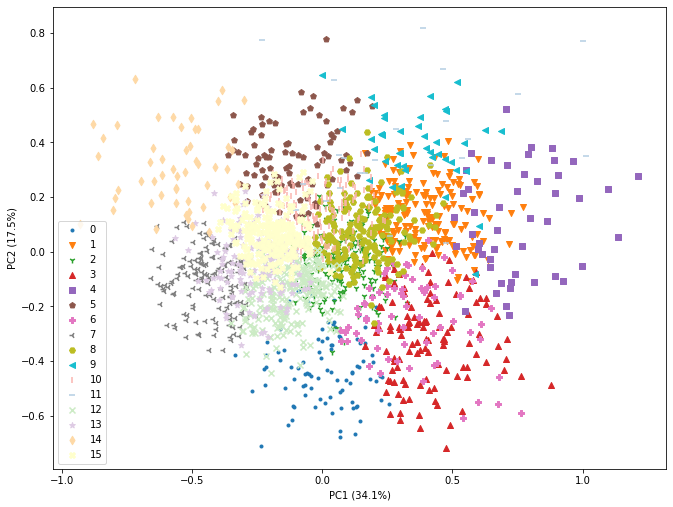

PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
11483  0.256649  0.154162  0.162050 -0.096632 -0.134206  0.048562  0.006920   
19209 -0.168378  0.179596 -0.068231  0.011810 -0.102788 -0.040944  0.080075   
14635  0.112668  0.511660  0.035641 -0.105859  0.191182  0.082646 -0.139561   
18815  0.147064  0.045533  0.196348 -0.298335 -0.115120 -0.110735 -0.057102   
17947  0.435751  0.010503  0.019013  0.194529 -0.173906  0.086310 -0.150838   
...         ...       ...       ...       ...       ...       ...       ...   
12160 -0.090730  0.271521 -0.335057  0.054372 -0.106262 -0.032035  0.038279   
18978 -0.392638 -0.024655 -0.167939 -0.071129 -0.179075  0.015719 -0.014749   
4541  -0.007826 -0.159302  0.010511 -0.174178  0.128596 -0.069554  0.001570   
285   -0.146981 -0.239423  0.055831 -0.166646  0.107362 -0.006100 -0.092138   
15357  0.411298  0.108789 -0.036582  0.022152  0.035115 -0.021227  0.014557   

           PCA7      PCA8      PCA9  ...     PCA54     PCA55     PCA56  \
11483  0.011630 -0.027196 -0.068274  ...  0.001805  0.002947  0.003744   
19209 -0.037010  0.082736  0.012956  ...  0.013359  0.005026  0.006927   
14635 -0.036732  0.103945 -0.051519  ...  0.001443  0.001458 -0.001132   
18815 -0.043947  0.368593 -0.094087  ...  0.003454 -0.004026 -0.004639   
17947  0.024491 -0.039001 -0.052339  ...  0.001551 -0.004291  0.003641   
...         ...       ...       ...  ...       ...       ...       ...   
12160 -0.005527 -0.085531 -0.058947  ... -0.000978  0.002032 -0.010871   
18978 -0.039235  0.010952  0.040543  ...  0.001273 -0.007380  0.004214   
4541  -0.026702  0.009445 -0.030041  ...  0.000764  0.000085 -0.003072   
285    0.021507  0.105080  0.011159  ... -0.002128  0.006688  0.005321   
15357  0.048793  0.205496  0.029906  ...  0.001668  0.004622  0.014256   

          PCA57     PCA58     PCA59     PCA60     PCA61     PCA62  Cluster16  
11483  0.002075 -0.000896  0.000405 -0.002782  0.000650 -0.000358          1  
19209  0.003088 -0.005210  0.001316 -0.000951 -0.001058  0.000321         15  
14635  0.001409 -0.000880  0.000951 -0.000378 -0.003594 -0.000113          5  
18815  0.002505 -0.000150  0.000430 -0.000780  0.001904 -0.000155          2  
17947 -0.000191  0.009286 -0.001026 -0.001022  0.000003 -0.000344          1  
...         ...       ...       ...       ...       ...       ...        ...  
12160 -0.001563 -0.005596 -0.003202  0.002188  0.001731  0.000035         15  
18978  0.001024  0.000983 -0.001618  0.001611  0.001238  0.001071          7  
4541  -0.001409 -0.000071 -0.000332  0.000474 -0.000099 -0.000096         12  
285    0.000213  0.000804 -0.000809  0.000003  0.000352  0.000213         12  
15357 -0.002800  0.001381 -0.001441 -0.001406 -0.000800 -0.000114          1  

[2000 rows x 64 columns]

In [20]:
# your code here
plot_clusters(scaled_data, 'Cluster16')

It does not seem to make much sense. In clustering, our end-goal is to find a set of clusters such that the data within the clusters will be very similar but we **also** want the clusters to be very different between each others. Here, we can see that distinct clusters seem very much alike (at least for the two first PCAs).
Therefore, there are two possible conclusions:
- **The visualization is wrong**: selecting only the two first PCAs is an oversimple approximation, and does not allow us to capture the variation in the dataset. Having a 3D visualization of being able to visualize this in even greater dimensions will allow us to see that the clusters are well separated. 
- **The clusters are not well separated even in the initial space**, and visualizing them thanks to the first two PCAs gives us a very insightful clue about the behavior in the initial space. 

In order to decide whether we could retain or not the first hypothesis, let us check:
- What would happen in a 3D scatterplot in the latent space encoded in the PCA
- What is the variance retained by the first 3 PC vectors.

##### 3D Diagnosis

In [21]:
from mpl_toolkits.mplot3d import Axes3D 

def plot_clusters(full_data, group_col):
    
    # seperate features only from cluster labels
    feature_columns = [colname for colname in list(full_data.columns) if 'Cluster' not in colname]
    features_only = full_data[feature_columns]

    # fit PCA to the whole data
    fitted_pca = PCA().fit(features_only)

    # take a sample of the whole data
    df_sample = features_only.sample(2000, random_state=109)

    # apply the PCA transform on the sample
    pca_sample = pd.DataFrame(fitted_pca.transform(df_sample), columns = ["PCA{}".format(i) for i in range(len(df_sample.columns.values))])
    pca_sample.index = df_sample.index
    
    # re-include a cluster label for the pca data
    pca_sample[group_col] = full_data.loc[pca_sample.index, group_col]
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection='3d')
    marker_types = [".", "v", "1", "^", "s", "p", "P", "3", "H", "<", "|", "_", "x", "*","d","X"]
    marker_colors = np.concatenate([np.array(plt.cm.tab10.colors),np.array(plt.cm.Pastel1.colors)])
    
    for i, (cluster_id, cur_df) in enumerate(pca_sample.groupby([group_col])):

        pca1_scores = cur_df.iloc[:,0]
        pca2_scores = cur_df.iloc[:,1]
        pca3_scores = cur_df.iloc[:, 2]
        ax.scatter(pca1_scores, pca2_scores, pca3_scores, label=cluster_id, c=marker_colors[i].reshape(1,-1), marker=marker_types[i])

    ax.set_xlabel("PC1 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[0],1)))
    ax.set_ylabel("PC2 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[1],1)))
    ax.set_zlabel("PC3 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[2],1)))
    plt.legend()
    plt.show(fig)
    # return pca_sample

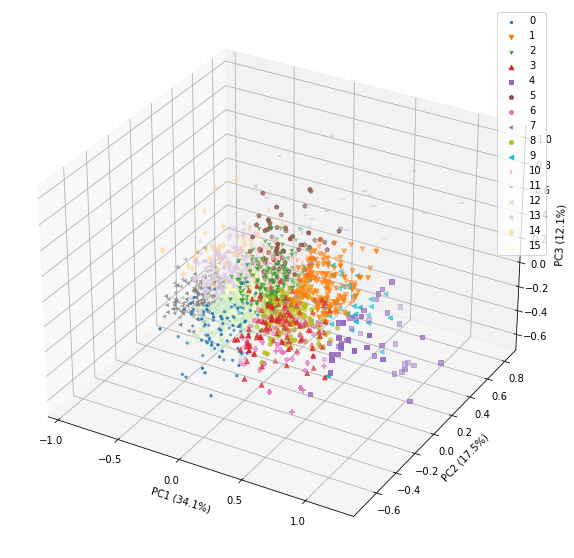

In [22]:
plot_clusters(scaled_data, 'Cluster16')

Therefore, we can see that, based on the 3D scatter plot above, **the clustering technique we have made does not allow to efficiently cluster the data when considering the first 3 PCAs**. I think that this is the only conclusion we can make based o this visualization. Indeed, we have seen that the first 3 PC vectors capture only $\approx 65$% of the initial variance in the data, so we canno't infer any conclusion solely based on this visualization. We might need to perform some quantitative analysis in order to assess the quality of this specific clustering.

The only hypothesis I am willing to make is that 16 clusters seems a bit much. We can see that the data is concentrated and selecting this many clusters will not provide clusters that are different between each others. Clustering based on music genre might not seem very relevant.

**1.3** Plot the silhouette scores using the function below, from lecture. Give it a 10% sample of the data to speed the visualization. How reasonable does the clustering seem based on this plot? How does it compare to the information in the plot above?


In [23]:
#modified code from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

def silplot(X, cluster_labels, clusterer, pointlabels=None):
    n_clusters = clusterer.n_clusters
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(11,8.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example we 
    # will set a limit
    ax1.set_xlim([-0.2, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
          ", the average silhouette_score is ", silhouette_avg,".",sep="")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(0,n_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    # axes will be first 2 PCA components
    
    pca = PCA(n_components=2).fit(X)
    X_pca = pca.transform(X) 
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    xs = X_pca[:, 0]
    ys = X_pca[:, 1]    

    
    if pointlabels is not None:
        for i in range(len(xs)):
            plt.text(xs[i],ys[i],pointlabels[i])

    # Labeling the clusters (transform to PCA space for plotting)
    centers = pca.transform(clusterer.cluster_centers_)
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % int(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

For n_clusters = 16, the average silhouette_score is 0.0998188148571944.


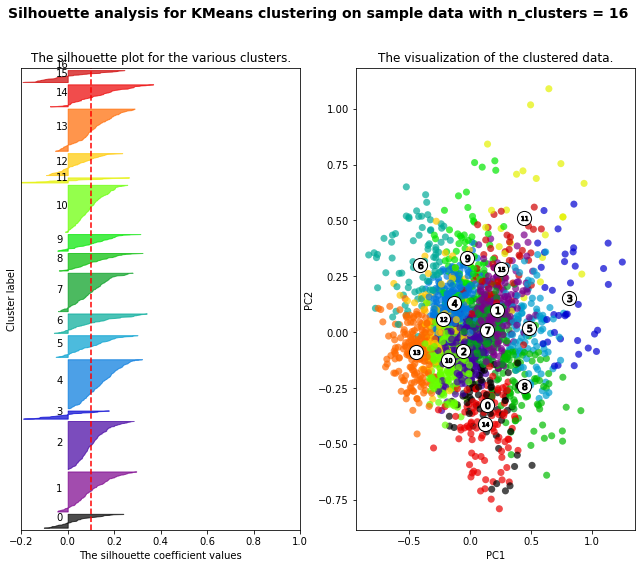

In [26]:
# your code here
silplot_data = scaled_data.sample(2000).iloc[:, :-1]
kmeans_silplot = KMeans(n_clusters=16, n_init=46, random_state=109).fit(silplot_data)
silplot(silplot_data.values, kmeans_silplot.labels_, kmeans_silplot)

Several pieces of information can be read from this silhouette plot:
- The clusters are not well separated. We can see that from the fact that the average silhouette score across **all** clusters is $\approx$ 0.1 and that, across every cluster, the silhouette scores are low-bounded by $\approx$ -0.2: **not reasonable**.
- The different clusters are very unequal in size. We can see that some clusters from 9 to 15 are much smaller than the other ones. This can be due to a very high assymetry in the clustering technique, and point out towards a *poor choice of the number of clusters in the clustering technique*.
- Some silhouette scores are negative for some clusters, meaning that some observations might be assigned to the wrong cluster

Therefore, from this silhouette plot, we can conclude that this clustering seems not reasonable. 

The information conveyed in this silhouette plot is very different from the PCA visualization: here, on the left plot, we do not lose any information (like we did before using only the first two PCs). Furthermore, our approach is quantitative (and not visual), meaning that this clustering can be a benchmark for other techniques, and that we might benefit from a principled way for performing method selection (across several clustering techniques, or across several ks for one clustering technique).  

**1.4** The FMA website also includes 4 different recording types (album, live recording, radio program, or single track). Repeat all of the above steps, but with the number of clusters corresponding to 4. That is :

- Run the k-means algorithm with 4 centroids instead of 16, creating a variable named `Cluster4` and adding it to the dataset.

- Visualize the results for k-means. Does 4 clusters seem to make sense from this plot?

- Plot the silhouette scores on a 10% sample of the data. How reasonable does the clustering seem based on this plot?


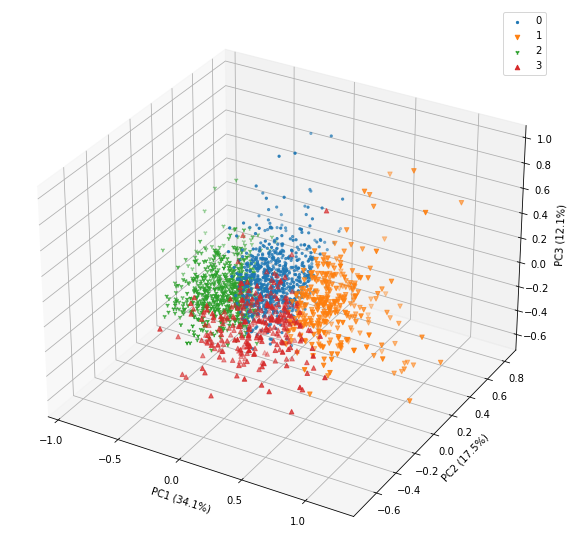

In [28]:
# your code here
kmeans = KMeans(n_clusters=4, n_init=46, random_state=109).fit(scaled_data.iloc[:, :-1])
scaled_data['Cluster4'] = kmeans.labels_
scaled_data.head()
plot_clusters(scaled_data, 'Cluster4')

The way we can leverage this plot is to **compare it with the other plot** that has 16 clusters. We can see that leveraging only 4 clusters seems to make much more sense than using 16 clusters. Indeed, we look for *homogeneous* clusters, and the clusters created with KMeans, K = 16, seemed not homogeneous. Here, with only 4 clusters, we see that the clusters seem very homogeneous. 

For n_clusters = 4, the average silhouette_score is 0.18384820444173863.


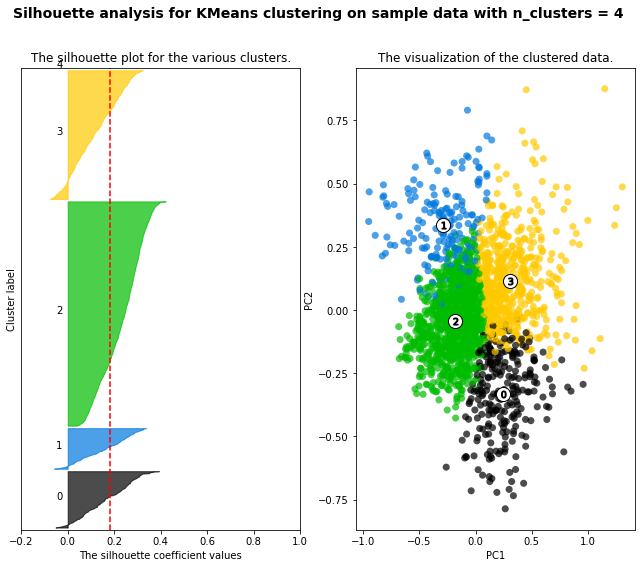

In [30]:
# your code here
# your code here
silplot_data = scaled_data.sample(2000).iloc[:, :-2]
kmeans_silplot = KMeans(n_clusters=4, n_init=46, random_state=109).fit(silplot_data)
silplot(silplot_data.values, kmeans_silplot.labels_, kmeans_silplot)

In overall terms, we can see that the average silhouette score for **all** clusters is higher.
**Question**: could we repeat the randomization process in order to be able to check if the two scores are significantly different ? Let us do this right now

In [31]:
scores_4means=[]
scores_16means=[]
for _ in range(20):
    silplot_data = scaled_data.sample(2000)
    kmeans_silplot = KMeans(n_clusters=4, n_init=46, random_state=109).fit(silplot_data)
    silhouette_avg = silhouette_score(silplot_data.values, kmeans_silplot.labels_)
    scores_4means.append(silhouette_avg)
    kmeans_silplot = KMeans(n_clusters=16, n_init=46, random_state=109).fit(silplot_data)
    silhouette_avg = silhouette_score(silplot_data.values, kmeans_silplot.labels_)
    scores_16means.append(silhouette_avg)

In [32]:
import scipy

In [33]:
scipy.stats.ttest_ind(scores_4means, scores_16means)

Ttest_indResult(statistic=-50.07579505321849, pvalue=2.619485745621231e-36)

Therefore, we can see that the two score distributions are significantly different and that the silhouette score for 4 clusters is significantly higher than the silhouette score for 16 clusters. Morevoer, we can see that the individual silhouette scores for every cluster are significant (across every cluster, the silhouette scores are low-bounded by  $\approx$0: **reasonable**.) Therefore, K-Means clustering with 4 clusters seems more reasonable than with 16 clusters, even though the projection on the space fo the first 3 PCs was misleading.

However, some silhouette scores for K = 4 are still negative for some clusters, meaning that some points might be wrongly assigned. 

**1.5** What do the results suggest? Does this make sense in the context of what we know about the problem?

The results suggest that leveraging K = 4 clusters seems more reasonable than using K = 16 clusters *when using the K Means algorithm*. We know that it makes sense for this problem because the FMA website includes 4 different recording types (album, live recording, radio program, or single track), so our data might be inherently clustered into 4 homogeneous groups. **However**, we can see from the silhouette plot that using the K Means algorithm with K = 4 does not seem very efficient since some observations seem assigned to the wrong cluster. Therefore, we might **need to find the optimal K** for K means or keep on **exploring with different clustering algorithms**.

<a id="part2"></a>

## <div class='exercise'>Problem 2: Other Ks </div>

[Return to contents](#contents)

In the previous problem, we examined the results of running k-means with 4 and 16 centroids on the fma data. In this problem, we will investigate a broader range of possible cluster sizes, with a borader range of metrics. 

**For all of these questions, you should work with a sample of 2,000 data points drawn with `pd.sample` and a random seed of 109.**

**2.1** Use the elbow method to evaluate the best choice of the number of clusters, plotting the total within-cluster variation against the number of clusters, for k-means clustering with $k \in \{1,2,...,20\}.$

**2.2** Use the average silhouette to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,...,20\}$. Plot the results. 

**2.3** Use the gap statistic to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,..,20\}$. Plot the results. 

**2.4** After analyzing the plots produced by all three of these measures, discuss the number of k-means clusters that you think is the best fit for this dataset. Defend your answer with evidence from the previous parts of this question, the three graphs produced here, and what you surmise about this dataset.

### Problem 2: Answers

[Return to contents](#contents)

In [36]:
scaled_data = scaled_data.iloc[:, :-2]  # removing the previous clustering results

In [4]:
random_sample = scaled_data.sample(2000, random_state=109)

**2.1** Use the elbow method to evaluate the best choice of the number of clusters, plotting the total within-cluster variation against the number of clusters, for k-means clustering with $k \in \{1,2,...,20\}.$


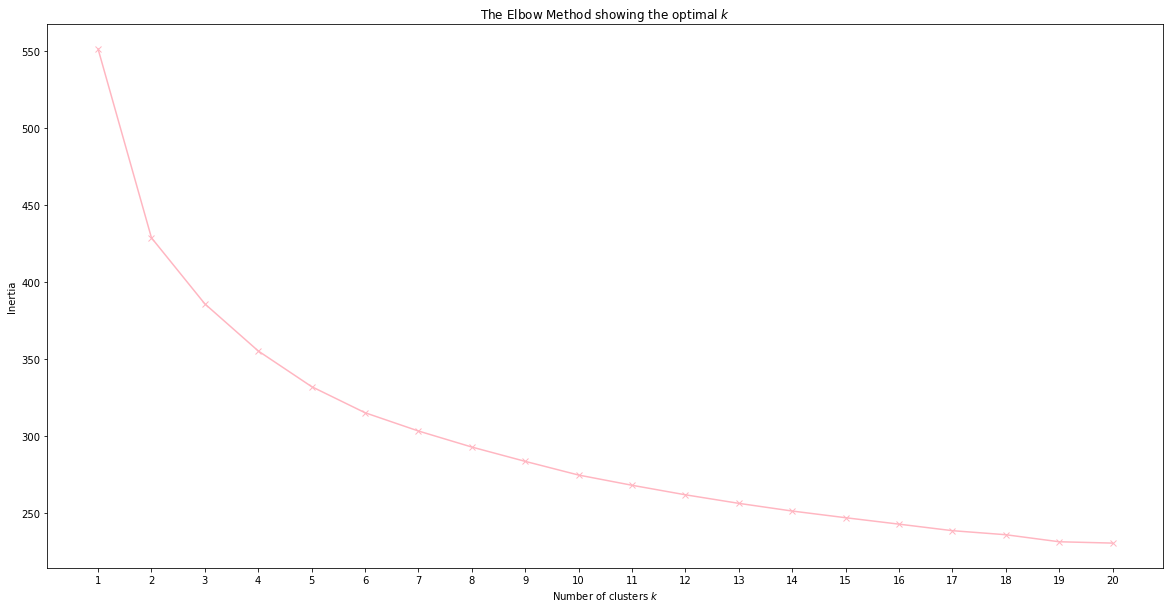

In [38]:
# your code here
wss = []
for i in range(1,21):
    fitx = KMeans(n_clusters=i, init='random', n_init=46, random_state=109).fit(random_sample)
    wss.append(fitx.inertia_)

plt.figure(figsize=(20,10))
plt.plot(range(1,21), wss, 'bx-', color='lightpink')
plt.xticks(range(1,21))
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

After visualizing the elbow plot, the optimal number of clusters **when running K means and using the total within-cluster variation as a method selection** is $k = 3, 4 \text{ or } 5$. We have observed this Kmeans clustering with K = 5 and, from the silhouette scores, it seems reasonable.

**2.2** Use the average silhouette to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,...,20\}$. Plot the results.


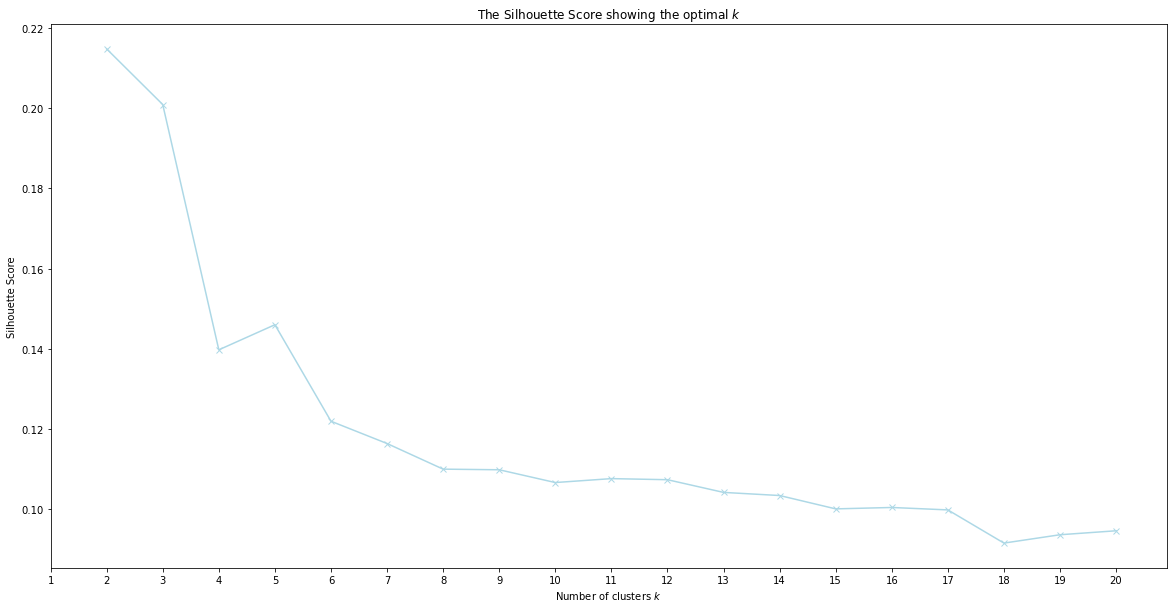

In [39]:
# your code here
ss = []
for i in range(2,21):
    kmeans_silplot = KMeans(n_clusters=i, init='random', n_init=46, random_state=109).fit(random_sample)
    silhouette_avg = silhouette_score(random_sample.values, kmeans_silplot.labels_)
    ss.append(silhouette_avg)
    
plt.figure(figsize=(20,10))
plt.plot(range(2,21), ss, 'bx-', color='lightblue')
plt.xticks(range(1,21))
plt.xlabel('Number of clusters $k$')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Score showing the optimal $k$')
plt.show()


From the above plot, we can see that the optimal number of clusters when running K means and using the average silhouette score across clusters as a method selection is  $k = 2$. 

**2.3** Use the gap statistic to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,..,20\}$. Plot the results.


Optimal clusters:  20


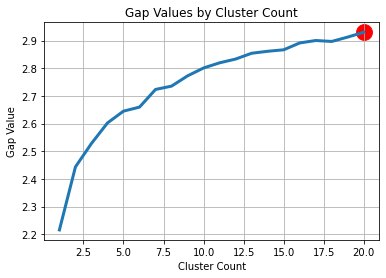

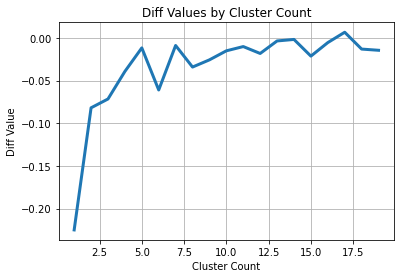

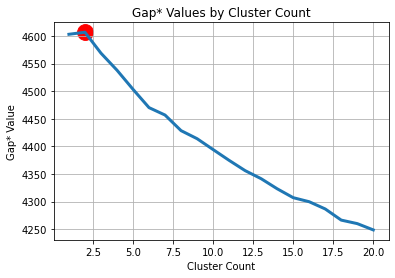

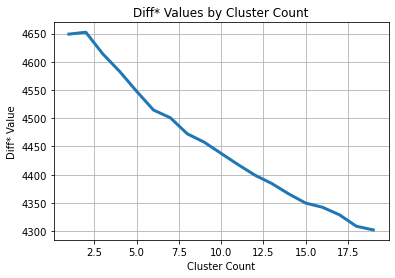

In [9]:
# your code here
gs_obj = OptimalK()

n_clusters = gs_obj(random_sample.values, n_refs=50, cluster_array=np.arange(1, 21))
print('Optimal clusters: ', n_clusters)

gs_obj.plot_results()

From the initial paper and the lecture, it is recommended to run the gap statistic method for $B = 500$ 'bootstrapped' datasets. However, here, for computational issues, I prefered to use $B = 50$. From the above plots, we can see that, according to the gap statistic model selection method, the optimal number of clusters is $K = 2$. However, selecting $K = 5$ also seems reasonable based on the previous plots

**2.4** After analyzing the plots produced by all three of these measures, discuss the number of k-means clusters that you think is the best fit for this dataset. Defend your answer with evidence from the previous parts of this question, the three graphs produced here, and what you surmise about this dataset.

I would say that the best number of k-means cluster is **5**. 

Indeed, this method is the result from the Elbo method for the within-cluster inertia and also the result of the close-best average silhouette. I trust these metrics more than I trust the statistical testing which is the gap statistic. Moreover, we can see on the first graph produced by the gap statistic that $Gap(5) \geq Gap(6) - s_6$, but this is not the first one to have such a property (2 exhibits the same inequality, so 2 is chosen in a greedy approach). Should we be able to allocate more computational resources (like we did here), the gap statistic will be able to choose 5, therefore agreeing with the 2 previous model selection techniques. Moreover, we can see that the *gap* between $Gap(5)$ and $Gap(6)$ is the widest gap in the plot, suggesting that we should choose 5 clusters.

Moreover, we have seen that this dataset exhibits 4 different recording types (album, live recording, radio program, or single track), corroborating the fact that 4 clusters are relevant for the clustering objective on this dataset, so encompassing 5 clusters might leverag additional flexibility. 


<a id="part3"></a>

## <div class='exercise'>Problem 3: Alternative Algorithms </div>

[Return to contents](#contents)

**3.1** Create a knee plot to determine an optimal epsilon then run DBSCAN on the data. How many clusters are found, and how well does this clustering perform on e.g. silhouette score, excluding the points not assigned to any cluster?  
*Note*: Do not use a sample of the data. This may take a few minutes to run.

**3.2** Hierarchical clustering. Run agglomerative clustering (using Ward's method), and plot the result using a dendrogram. Interpret the results, and describe the cluster size(s) the plot suggests. What level of aggregation is suggested by the sihoutte score?

**3.3** Overall, what do you conclude about the number and kind of clusters in this data set?

### Problem 3: Answers

[Return to contents](#contents)

**3.1** Create a knee plot to determine an optimal epsilon then run DBSCAN on the data. How many clusters are found, and how well does this clustering perform on e.g. silhouette score, excluding the points not assigned to any cluster?
*Note*: Do not use a sample of the data. This may take a few minutes to run.


First, let us set the parameter $MinPts = 4$, like it is recommended in the original DBSCAN paper. Thanks to this, we are going to be able to creae the knee plot and determine epsilon, the second parameter of the DBSCAN algorithm.

In [6]:
# your code here
def plot_epsilon(df, min_samples):
    fitted_neigbors = NearestNeighbors(n_neighbors=min_samples).fit(df)
    distances, indices = fitted_neigbors.kneighbors(df)
    dist_to_nth_nearest_neighbor = distances[:,-1]
    plt.plot(np.sort(dist_to_nth_nearest_neighbor))
    plt.xlabel("Index\n(sorted by increasing distances)")
    plt.ylabel("{}-NN Distance (epsilon)".format(min_samples-1))
    plt.tick_params(right=True, labelright=True)

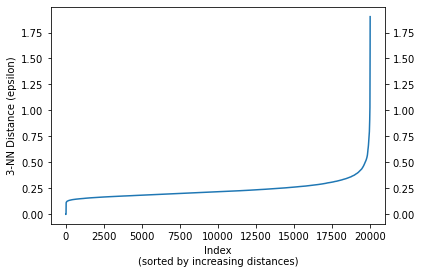

In [7]:
plot_epsilon(scaled_data, 4)

From the knee plot, we should select $\epsilon = 0.5$

In [10]:
fitted_dbscan = DBSCAN(eps=0.5, min_samples=4, n_jobs=-1).fit(scaled_data)

In [11]:
np.unique(fitted_dbscan.labels_)

array([-1,  0,  1], dtype=int64)

The DBSCAN algorithm only unveils two classes and a noisy observations class.

In [12]:
silhouette_avg = silhouette_score(scaled_data[fitted_dbscan.labels_ > -1], fitted_dbscan.labels_[fitted_dbscan.labels_ > -1])
silhouette_avg

We can see that the silhouette score of the clustering produced by DBSCAN is way higher than the previous ones. This is a strong indicator that the clustering created by DBSCAN is of better quality than the ones produced by KMeans. There might be a lot of reasons for that, among which:
- The shape of the cluster created by KMeans is convex (included in spheres) whereas the geometry of clusters created by DBSCAN is more complex (included in a Riemann manifold)
- The DBSCAN algorithm infers noisy observations whereas K Means clusters them

**3.2** Hierarchical clustering. Run agglomerative clustering (using Ward's method), and plot the result using a dendrogram. Interpret the results, and describe the cluster size(s) the plot suggests. What level of aggregation is suggested by the sihoutte score?


Running agglomerative clustering with Ward method requires computing the a priori matrix distances, which involves the computation of $\frac{n(n-1)}{2}$ pairwise distances: computationally intractable (*need to store a vector of shape $199999000$ elements, all being double precision floats, each encoded in memory using 64 Bits = 8 octets, requiring a total memory of 1.6 GB, which is way above the default memory of a Jupyter Notebook*!) Therefore, we will perform hierarchical clustering using Ward's method with only a sample of 200 elements of our data.
This will be useful both for computational issues and visualization of the dendogram.

In [4]:
random_sample = scaled_data.sample(200, random_state=109)

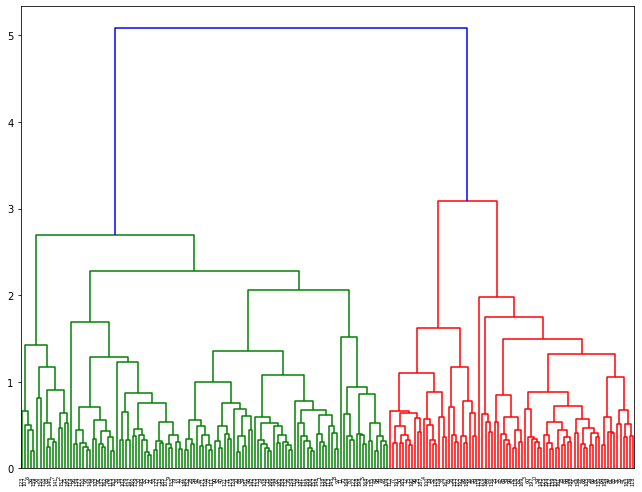

In [7]:
# your code here
plt.figure(figsize=(11,8.5))
dist_mat = pdist(random_sample, metric="euclidean")
ward_data = hac.ward(dist_mat)

hac.dendrogram(ward_data)
plt.show()

From the plot above, we can see that the number of clusters suggested is K = 6 (setting the threshold at $Inertia = 2$).

In [13]:
# your code here
thresholds = np.linspace(1, 5, 20)
silhouette_scores = []
ks = []
for t in thresholds:
    labellings = hac.fcluster(ward_data, t=t, criterion='distance')
    ks.append(len(np.unique(labellings)))
    silhouette_scores.append(silhouette_score(random_sample, labellings))

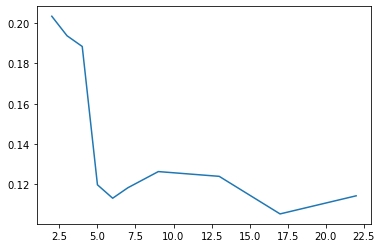

In [14]:
plt.plot(ks, silhouette_scores)

Therefore, the silhouette plot suggests **k=2** clusters.

**3.3** Overall, what do you conclude about the number and kind of clusters in this data set?

Overall, I would conclude that there are two clusters in this data set. Indeed, we have ran different kinds of unsupervised clustering techniques: some that assume a shape on clusters and some that don't. Some where we needed ot a priori specify the number of clusters, and performed model selection for selecting the hyperparameter $k$.

The best silhouette scores we got from all these methods is with the DBSCAN algorithm, retaining only 2 clusters. Moreover, we recall that from the gap statistic plot, the optimal value of number of clusters that would have been selected is 2. Last, we can see that running DBSCAN resulting in 2 clusters performs way better (in terms of silhouette score) than Kmeans algorithm with K = 2 or hierarchical clustering with K = 2. Therefore, this means that the shape of the clusters is non convex (for the KMeans algorithm, and for Hirearchical Clustering where we have used Euclidian distance). The shape of the cluster is more complex. 
